In [1]:
# import necessar libraries
import pandas as pd
import numpy as np

import data_preparation as dp
import visualizations as viz

import warnings
warnings.filterwarnings(action='ignore')

# read data
data = pd.read_csv("../data/training_set_features.csv", index_col = 0)
vac = pd.read_csv("../data/training_set_labels.csv", index_col = 0)

all_data = data.merge(vac['h1n1_vaccine'], left_index=True, right_index=True)

all_data.drop(['doctor_recc_seasonal',
               'opinion_seas_vacc_effective',
               'opinion_seas_risk',
               'opinion_seas_sick_from_vacc'], 
              axis = 1,
              inplace=True)

X = dp.missing(all_data)
y = X.pop('h1n1_vaccine')

for c in X.columns:
    X = dp.dummy(X, c)

In [2]:
'''import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("L", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]'''

'import re\nregex = re.compile(r"\\[|\\]|<", re.IGNORECASE)\nX.columns = [regex.sub("L", col) if any(x in str(col) for x in set((\'[\', \']\', \'<\'))) else col for col in X.columns.values]'

In [2]:
X.columns = X.columns.str.replace('<', 'L')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

XBG model is handled separately as some of the column names had to be modified to fit the model.

In [4]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
dp.scores(X_train, y_train, X_test, y_test, xgbc)

[14:05:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:05:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


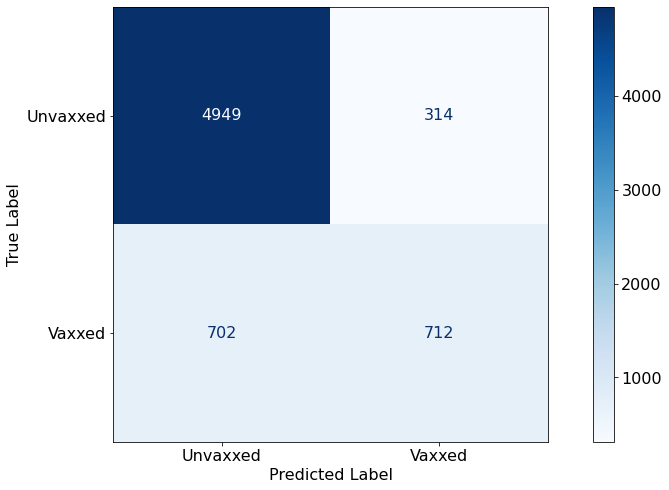

In [5]:
viz.plot_cm(X_train, y_train, X_test, y_test, xgbc)